In [2]:
import numpy as np
import matplotlib.pylab as plt
import time
import uproot
import awkward as ak

<span style="font-family: Comic Sans MS; font-size:25px; color:orange">

Open Root File

In [3]:
# load root file

infile_name = 'TB_FIRE_1101_hits.root'
infile = uproot.open(infile_name)

In [4]:
# get headings

print(type(infile))
keys = infile.keys()
print(keys)

hits = infile['Hits']
print(type(hits))

<class 'uproot.reading.ReadOnlyDirectory'>
['Hits;1']
<class 'uproot.models.TTree.Model_TTree_v20'>


In [5]:
# expand branches within headings(keys) 

branches = infile['Hits'].keys()

for branch in branches:
    print(f"{branch:20s} {infile['Hits'][branch]}")

# extract specific branch
pt = infile['Hits']['TLU_number']
pt

TLU_number           <TBranch 'TLU_number' at 0x01dbf2d0e900>
timestamp            <TBranchElement 'timestamp' at 0x01dbf2d0fcb0>
plane_ID             <TBranchElement 'plane_ID' at 0x01dbf2d8b250>
ch_ID                <TBranchElement 'ch_ID' at 0x01dbf2d8b390>
amplitude            <TBranchElement 'amplitude' at 0x01dbf2dec9d0>
toa                  <TBranchElement 'toa' at 0x01dbf2decb00>


<TBranch 'TLU_number' at 0x01dbf2d0e900>

<span style="font-family: Comic Sans MS; font-size:25px; color:orange">

Read Data In Root File Using Awkward

In [6]:
pt = hits['TLU_number']
amp = hits['amplitude']
toa = hits['toa']

print(amp)
print()


print(amp.array())
print()

print(len(amp.array()))
print()

for i in range(5):
    print(amp.array()[i])



<TBranchElement 'amplitude' at 0x01dbf2dec9d0>

[[39, 27, 183, 73, 435, 83, 38, 63, ..., 71, 558, 48, 156, 20, 161, 155], ...]

2356797

[39, 27, 183, 73, 435, 83, 38, 63, 32, ..., 27, 71, 558, 48, 156, 20, 161, 155]
[13, 30, 81, 100, 471, 398, 29, 88, 41, ..., 227, 50, 29, 45, 108, 19, 54, 28]
[17, 35, 26, 11, 406, 232, 82, 80, 17, ..., 55, 47, 70, 54, 80, 208, 18, 89]
[87, 55, 530, 57, 116, 153, 32, 25, ..., 11, 12, 14, 67, 129, 350, 184, 130]
[50, 265, 72, 136, 79, 107, 30, 379, ..., 33, 125, 133, 26, 33, 409, 96, 83]


[39, 27, 183, 73, 435, 83, 38, 63, 32, ..., 70, 56, 107, 53, 356, 61, 29, 67]


Text(0.5, 0, 'Amplitude')

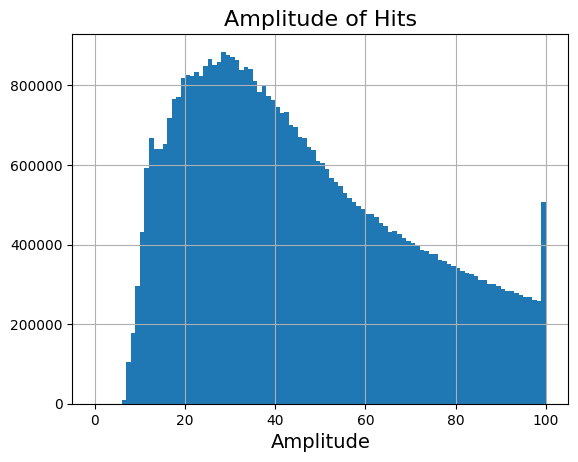

In [9]:
# creating an hitsogram using ak flattening

print(ak.flatten(amp.array()))

plt.figure()
plt.hist(ak.flatten(amp.array()),bins=100,range=(0,100))
plt.grid()
plt.title('Amplitude of Hits',fontsize=16)
plt.xlabel(r'Amplitude',fontsize=14)